<a href="https://colab.research.google.com/github/Vangzbill/PCVK_Ganjil_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi**

---

Nama      : Sabilla Luthfi Rahmadhan

No Absen  : 19

Kelas     : TI-3G
***

# TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

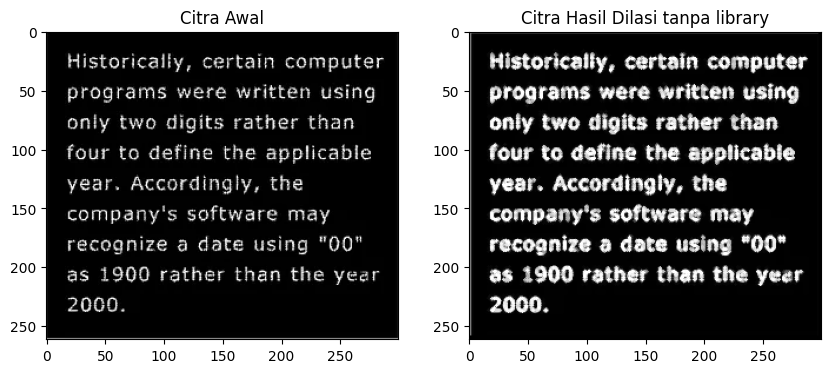

In [3]:
img_3 = cv.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv.IMREAD_GRAYSCALE)
dilation_3 = np.zeros(img_3.shape, img_3.dtype)
matrix_3 = [
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
]

for y in range(len(matrix_3) // 2, img_3.shape[0] - len(matrix_3)):
  for x in range(len(matrix_3[0]) // 2, img_3.shape[1] - len(matrix_3)):
    maksimum = 0
    for i in range(len(matrix_3)):
      for j in range(len(matrix_3[0])):
        if(matrix_3[i][j] == 1):
          nilai_piksel = img_3[y + i - len(matrix_3) // 2, x + j - len(matrix_3[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    dilation_3[y, x] = maksimum

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_3, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 2, 2)
plt.imshow(dilation_3, cmap='gray')
plt.title('Citra Hasil Dilasi tanpa library')

plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

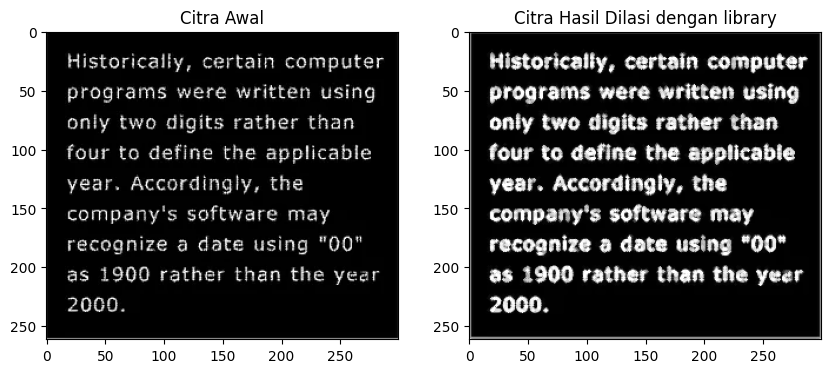

In [4]:
img_4 = cv.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv.IMREAD_GRAYSCALE)
dilation_4 = np.zeros(img_4.shape, img_4.dtype)
matrix_4 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8
)

dilation_4 = cv.dilate(img_4, matrix_4, iterations=1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_4, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 2, 2)
plt.imshow(dilation_4, cmap='gray')
plt.title('Citra Hasil Dilasi dengan library')

plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Text(0.5, 1.0, 'Citra Hasil Erosi tanpa library')

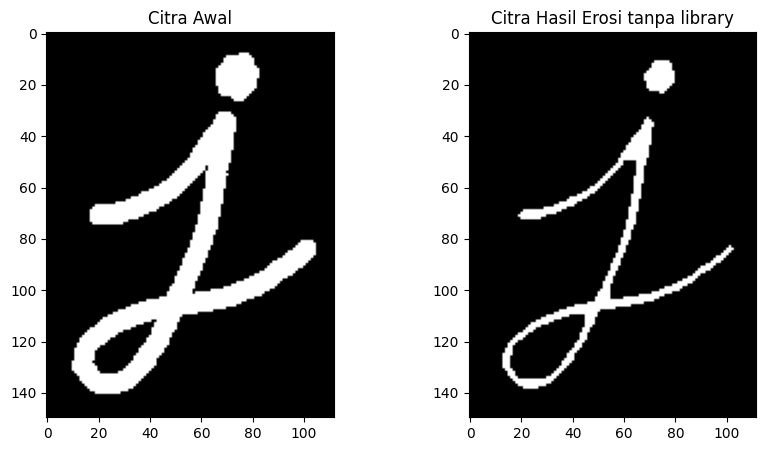

In [5]:
img_5 = cv.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv.IMREAD_GRAYSCALE)
erode_5 = np.zeros(img_5.shape, img_5.dtype)

height, width = img_5.shape
se_size = 5
se_half = se_size // 2

for i in range(se_size // 2, height - se_size // 2):
    for j in range(se_size // 2, width - se_size // 2):
        roi = img_5[i - se_size // 2:i + se_size // 2 + 1, j - se_size // 2:j + se_size // 2 + 1]
        erode_5[i, j] = np.min(roi)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_5, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 2, 2)
plt.imshow(erode_5, cmap='gray')
plt.title('Citra Hasil Erosi tanpa library')


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Text(0.5, 1.0, 'Citra Hasil Erosi dengan library')

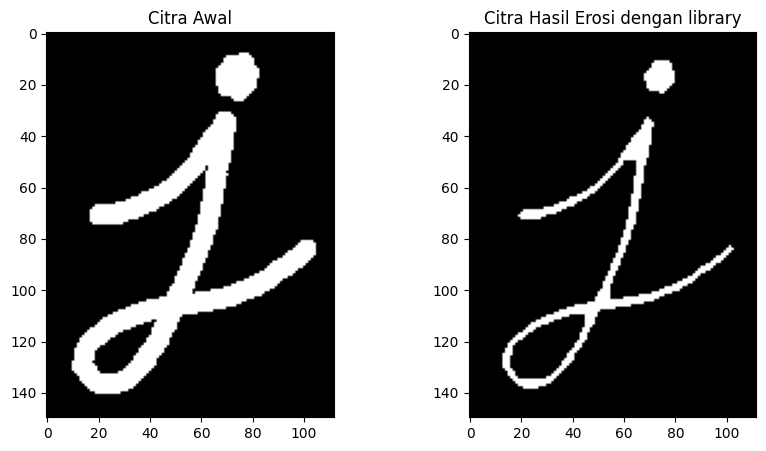

In [6]:
img_6 = cv.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv.IMREAD_GRAYSCALE)
erode_6 = np.zeros(img_6.shape, img_6.dtype)
se = np.ones((5, 5), dtype=np.uint8)

erode_6 = cv.erode(img_6, se)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_6, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 2, 2)
plt.imshow(erode_6, cmap='gray')
plt.title('Citra Hasil Erosi dengan library')


7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

* **Operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa library**

Text(0.5, 1.0, 'Citra Opening tanpa library')

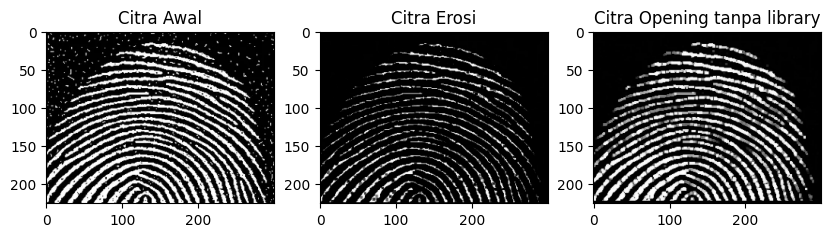

In [7]:
img_7_1 = cv.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)
erode_7_1 = np.zeros(img_7_1.shape, img_7_1.dtype)
opening_7_1 = np.zeros(img_7_1.shape, img_7_1.dtype)
se_7_1 = np.ones((3, 3), dtype=np.uint8)

height_7_1, width_7_1 = img_7_1.shape
se_size_7_1 = 3
se_half_7_1 = se_size_7_1 // 2

for i in range(se_half_7_1, height_7_1 - se_half_7_1):
    for j in range(se_half_7_1, width_7_1 - se_half_7_1):
        roi = img_7_1[i - se_half_7_1:i + se_half_7_1 + 1, j - se_half_7_1:j + se_half_7_1 + 1]
        erode_7_1[i, j] = np.min(roi)

for y in range(len(se_7_1) // 2, img_7_1.shape[0] - len(se_7_1)):
  for x in range(len(se_7_1[0]) // 2, img_7_1.shape[1] - len(se_7_1)):
    maksimum = 0
    for i in range(len(se_7_1)):
      for j in range(len(se_7_1[0])):
        if(se_7_1[i][j] == 1):
          nilai_piksel = erode_7_1[y + i - len(se_7_1) // 2, x + j - len(se_7_1[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    opening_7_1[y, x] = maksimum

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_7_1, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(erode_7_1, cmap='gray')
plt.title('Citra Erosi')
plt.subplot(1, 3, 3)
plt.imshow(opening_7_1, cmap='gray')
plt.title('Citra Opening tanpa library')

* **Operasi opening dengan Structuring Element berbentuk square 3 x 3 dengan library**

Text(0.5, 1.0, 'Citra Opening dengan Library')

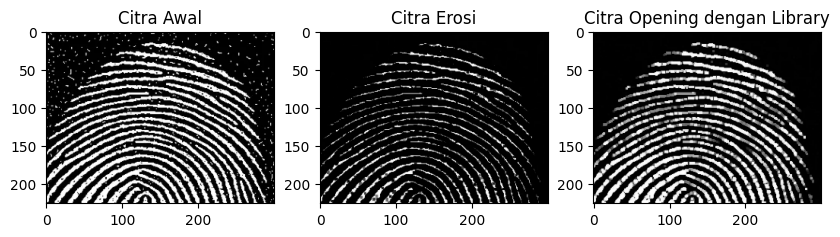

In [8]:
img_7_2 = cv.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)
erode_7_2 = np.zeros(img_7_2.shape, img_7_2.dtype)
opening_7_2 = np.zeros(img_7_2.shape, img_7_2.dtype)
se_7_2 = np.ones((3, 3), dtype=np.uint8)

erode_7_2 = cv.erode(img_7_2, se_7_2)
opening_7_2 = cv.dilate(erode_7_2, se_7_2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_7_2, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(erode_7_2, cmap='gray')
plt.title('Citra Erosi')
plt.subplot(1, 3, 3)
plt.imshow(opening_7_2, cmap='gray')
plt.title('Citra Opening dengan Library')